In [1]:
import numpy as np
import scipy

import oracles, optimization
import plot_trajectory_2d

import datetime
from sklearn.datasets import load_svmlight_file

import matplotlib.pyplot as plt

In [32]:
SEED = 42
np.random.seed(SEED)

In [12]:
# check grad_finite_diff, hess_finite_diff

n=4
m=5
A = np.random.rand(m,n)
b = np.random.choice([-1,1], size=m)

for i in range(3):
    x = np.random.uniform(low=-1., high=1., size=n)
    print(f'x={x}')
    regcoef = 0.5
    logreg_oracle = oracles.create_log_reg_oracle(A, b, regcoef)
    func_x = logreg_oracle.func(x)
    grad_x = logreg_oracle.grad(x)
    hess_x = logreg_oracle.hess(x)
    grad_approx_x = oracles.grad_finite_diff(logreg_oracle.func,x)
    hess_approx_x = oracles.hess_finite_diff(logreg_oracle.func,x)
    precision = 5
    np.testing.assert_almost_equal(grad_x, grad_approx_x, precision)
    np.testing.assert_almost_equal(hess_x, hess_approx_x, precision)
print ('all tests OK')

x=[ 0.94751104 -0.53445732 -0.81878713  0.23677202]
x=[-0.23507602  0.96646177 -0.06647421  0.71988081]
x=[ 0.36061508 -0.0990015  -0.97347008  0.88440351]
all tests OK


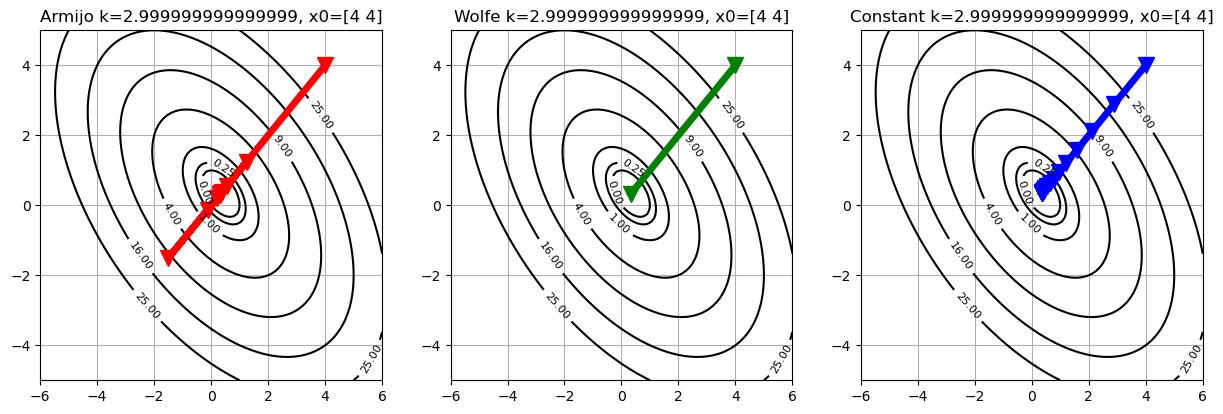

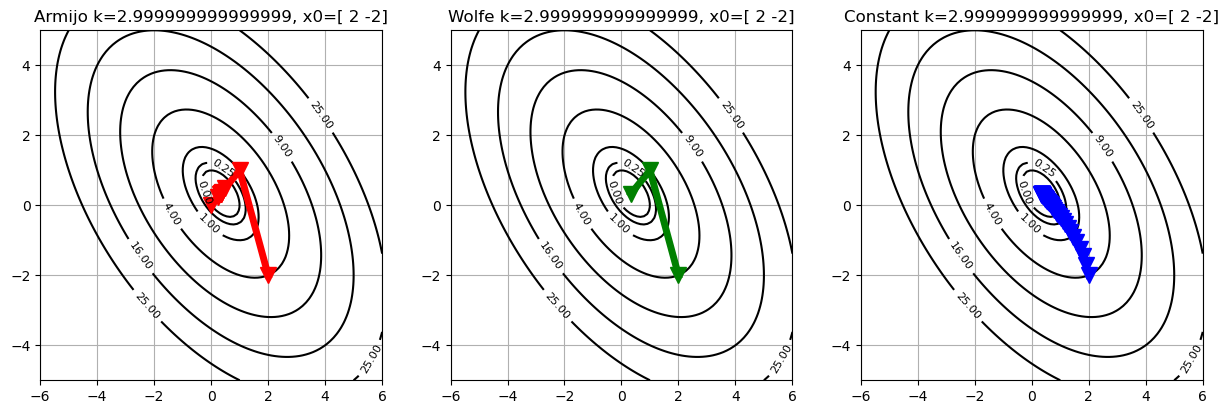

In [13]:
# exp 3.1

A = np.array([[2,1],[1,2]])
b = np.array([1,1])
oracle = oracles.QuadraticOracle(A, b)
x0 = np.array([4,4])
k = np.linalg.cond(A)
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,2)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,3)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')

x0 = np.array([2,-2])
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,4)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,5)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,6)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')



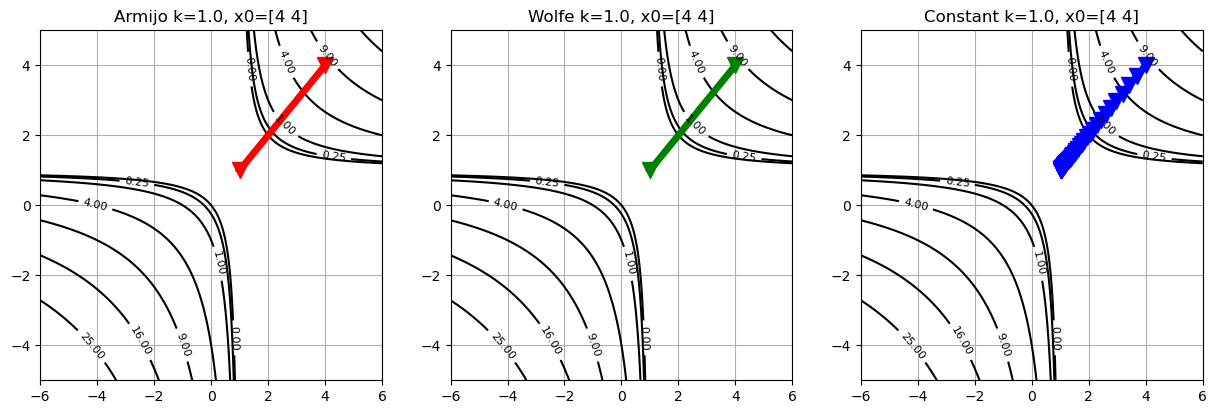

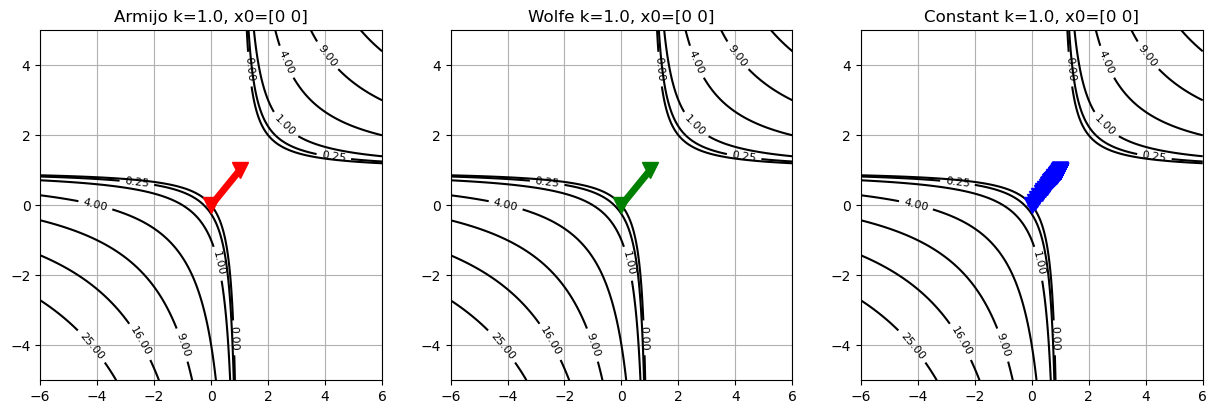

In [16]:
A = np.array([[0,1],[1,0]])
b = np.array([1,1])
oracle = oracles.QuadraticOracle(A, b)
x0 = np.array([4,4])
k = np.linalg.cond(A)
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,2)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,3)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')

x0 = np.array([0,0])
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,4)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,5)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,6)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')

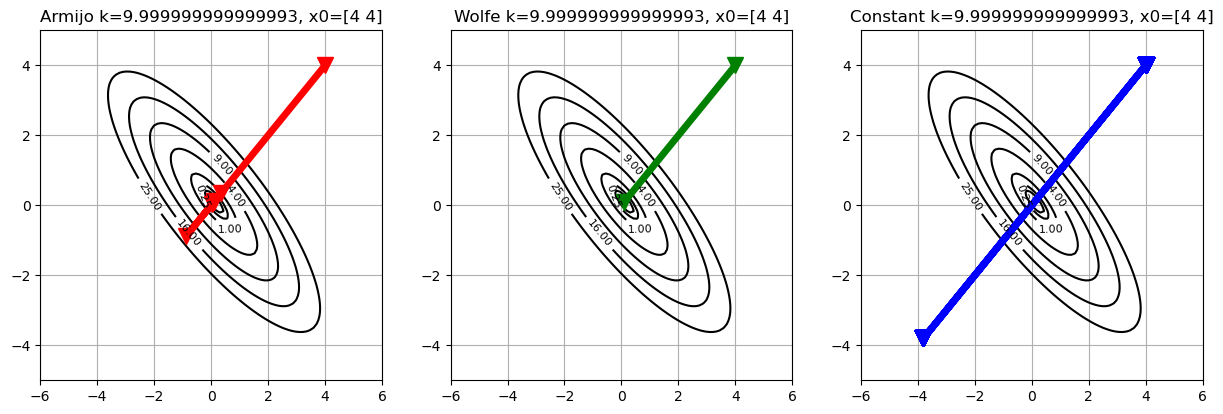

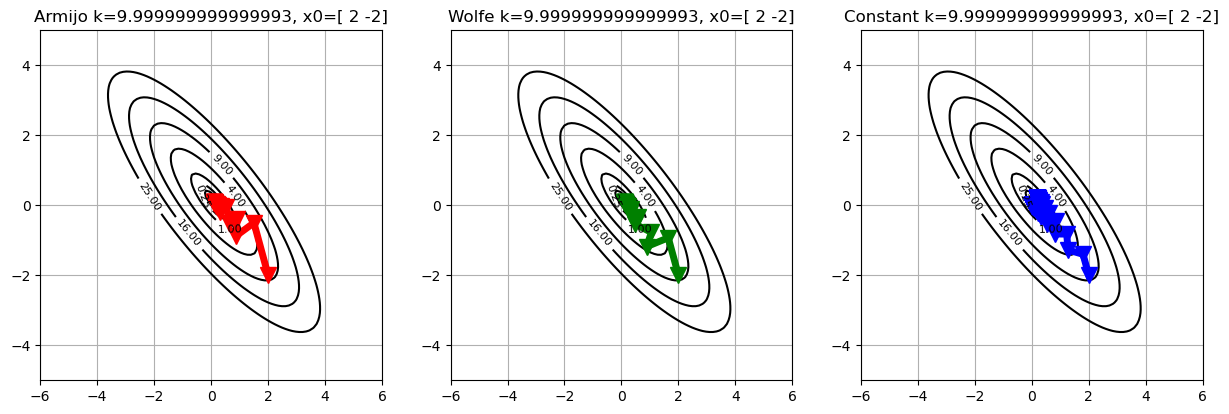

In [17]:
A = np.array([[11,9],[9,11]])
b = np.array([2,2])
oracle = oracles.QuadraticOracle(A, b)
x0 = np.array([4,4])
k = np.linalg.cond(A)
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,2)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,3)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')

x0 = np.array([2,-2])
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Armijo'}, trace=True)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Wolfe'}, trace=True)
x_const, _, history_const = optimization.gradient_descent(oracle, x0, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,3,4)
plt.title(f'Armijo k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_armijo['x'], color='r')
plt.subplot(2,3,5)
plt.title(f'Wolfe k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_wolfe['x'], color='g')
plt.subplot(2,3,6)
plt.title(f'Constant k={k}, x0={x0}')
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history_const['x'], color='b')

n=1...
n=10...
n=100...
n=1000...


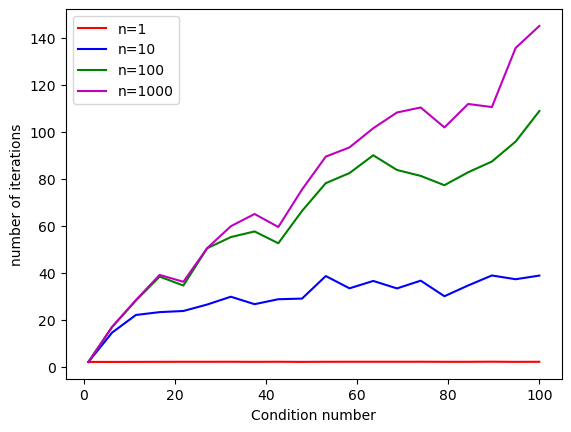

In [6]:
# exp 3.2

nn = [1,10,100,1000] #,10000]
nn_colors = ['r', 'b', 'g', 'm'] #, 'k']
kk = np.linspace(1,100,20)

for i,n in enumerate(nn):
    print(f'n={n}...')
    k_x = []
    iters_y = []
    for k in kk:
        iters = []
        for run in range(100):
            v = np.random.randint(low=1, high=k+1, size=n)
            A = scipy.sparse.diags(v)
            b = np.random.random(n)
            oracle = oracles.QuadraticOracle(A,b)
            x0 = np.zeros(n)
            x,message,history = optimization.gradient_descent(oracle, x0, trace=True)
            if message=='success':
                iters.append(len(history['time']))
        iters_y.append(np.array(iters).mean())
        k_x.append(k)
    plt.plot(k_x, iters_y, color=nn_colors[i],label=f'n={n}')
plt.xlabel('Condition number')
plt.ylabel('number of iterations')
plt.legend()
plt.show()

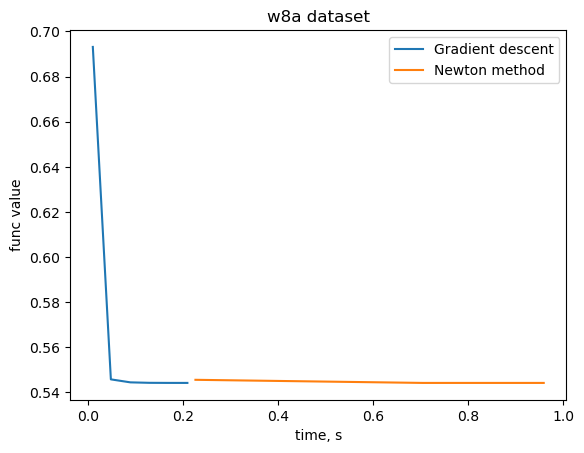

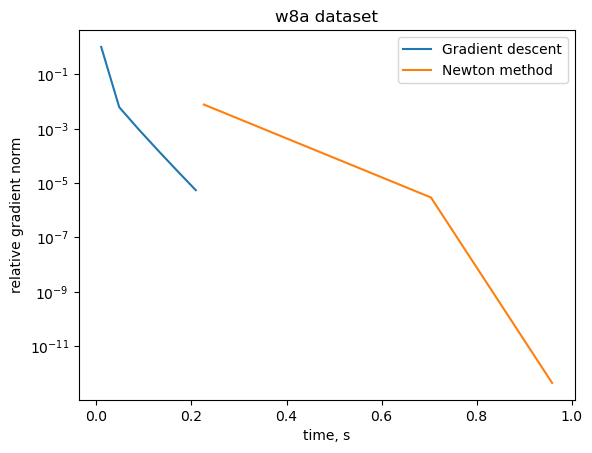

In [3]:
#exp 3.3

#w8a
# of classes: 2
# of data: 49,749 / 14,951 (testing)
# of features: 300 / 300 (testing)
X, y = load_svmlight_file('w8a.txt')
x0 = np.zeros(300)
reg_coef = 1/2
oracle = oracles.create_log_reg_oracle(X, y, reg_coef)
x_grad, _, history_gd = optimization.gradient_descent(oracle, x0, trace=True)
x_newt, _, history_nw = optimization.newton(oracle, x0, trace=True)
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))

plt.plot(history_gd['time'],history_gd['func'], label='Gradient descent')
plt.plot(history_nw['time'],history_nw['func'], label='Newton method')
plt.title('w8a dataset')
plt.xlabel('time, s')
plt.ylabel('func value')
plt.legend()
plt.show()

grads_gd = np.array(history_gd['grad_norm'])
grads_nw = np.array(history_nw['grad_norm'])
plt.plot(history_gd['time'],grads_gd**2/grad_norm_x0**2, label='Gradient descent')
plt.plot(history_nw['time'],grads_nw**2/grad_norm_x0**2, label='Newton method')
plt.title('w8a dataset')
plt.xlabel('time, s')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()
plt.show()

GD ok.
Newton ok.


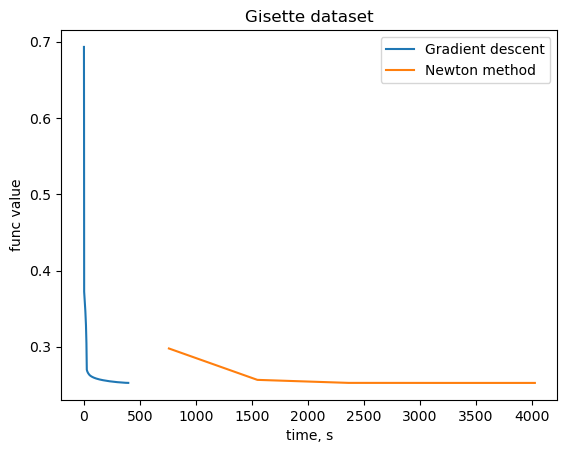

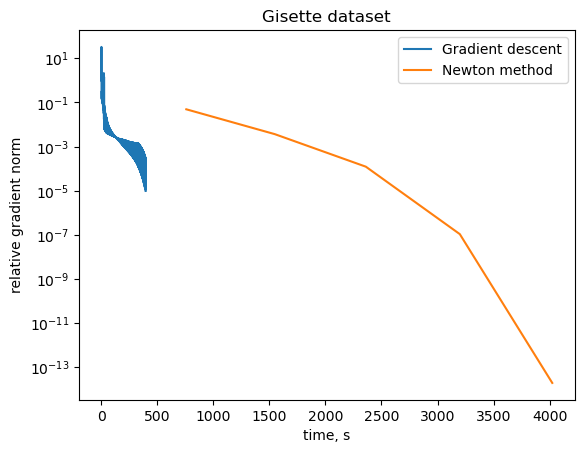

In [3]:
#gisette
# of classes: 2
# of data: 6,000 / 1,000 (testing)
# of features: 5,000

X, y = load_svmlight_file('gisette_scale.bz2')
x0 = np.zeros(5000)
reg_coef = 1/2
oracle = oracles.create_log_reg_oracle(X, y, reg_coef)
x_grad, _, history_gd = optimization.gradient_descent(oracle, x0, trace=True)
print('GD ok.')
x_newt, _, history_nw = optimization.newton(oracle, x0, trace=True)
print('Newton ok.')
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))

plt.plot(history_gd['time'],history_gd['func'], label='Gradient descent')
plt.plot(history_nw['time'],history_nw['func'], label='Newton method')
plt.title('Gisette dataset')
plt.xlabel('time, s')
plt.ylabel('func value')
plt.legend()
plt.show()

grads_gd = np.array(history_gd['grad_norm'])
grads_nw = np.array(history_nw['grad_norm'])
plt.plot(history_gd['time'],grads_gd**2/grad_norm_x0**2, label='Gradient descent')
plt.plot(history_nw['time'],grads_nw**2/grad_norm_x0**2, label='Newton method')
plt.title('Gisette dataset')
plt.xlabel('time, s')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()
plt.show()

GD ok.
Newton ok.


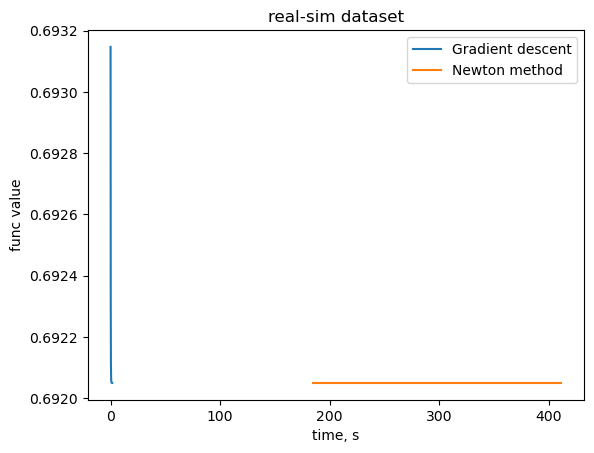

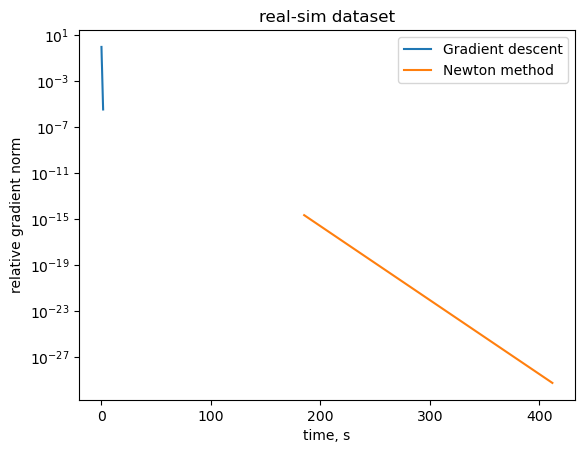

In [112]:
#real-sim
# of classes: 2
# of data: 72,309
# of features: 20,958

X, y = load_svmlight_file('real-sim.bz2')
x0 = np.zeros(20958)
reg_coef = 1/2
oracle = oracles.create_log_reg_oracle(X, y, reg_coef)
x_grad, _, history_gd = optimization.gradient_descent(oracle, x0, trace=True)
print('GD ok.')
x_newt, _, history_nw = optimization.newton(oracle, x0, trace=True)
print('Newton ok.')
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))

plt.plot(history_gd['time'],history_gd['func'], label='Gradient descent')
plt.plot(history_nw['time'],history_nw['func'], label='Newton method')
plt.title('real-sim dataset')
plt.xlabel('time, s')
plt.ylabel('func value')
plt.legend()
plt.show()

grads_gd = np.array(history_gd['grad_norm'])
grads_nw = np.array(history_nw['grad_norm'])
plt.plot(history_gd['time'],grads_gd**2/grad_norm_x0**2, label='Gradient descent')
plt.plot(history_nw['time'],grads_nw**2/grad_norm_x0**2, label='Newton method')
plt.title('real-sim dataset')
plt.xlabel('time, s')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()
plt.show()

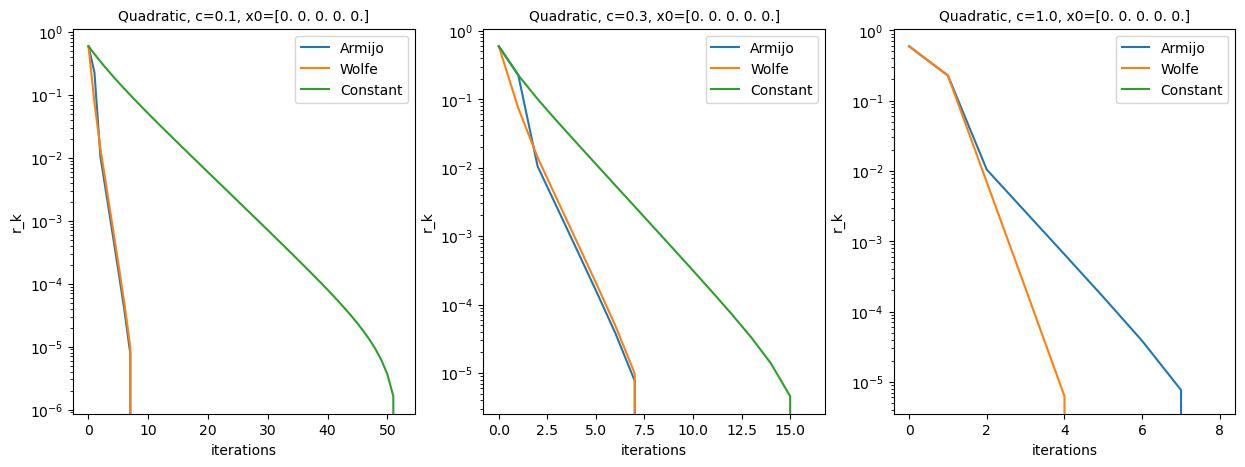

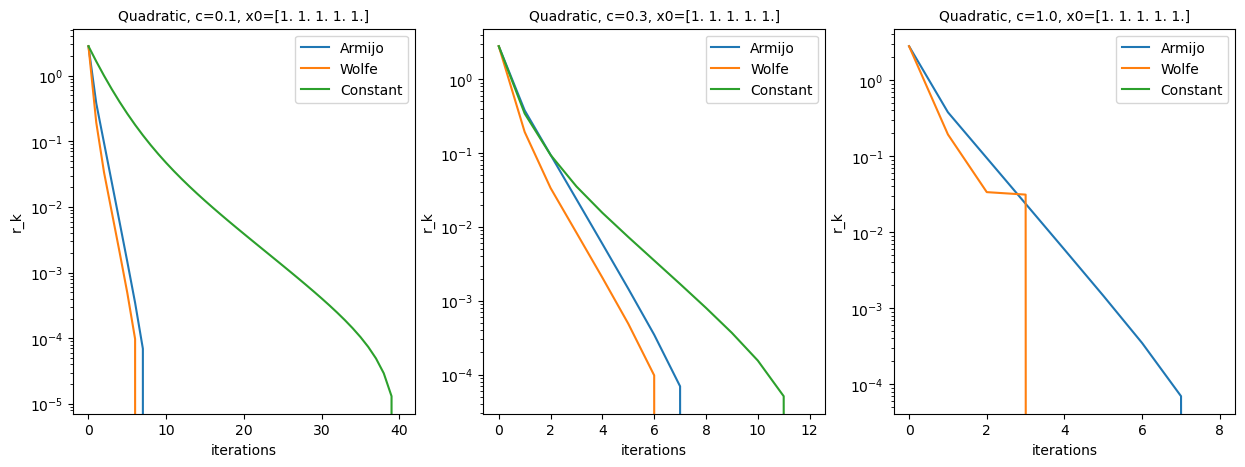

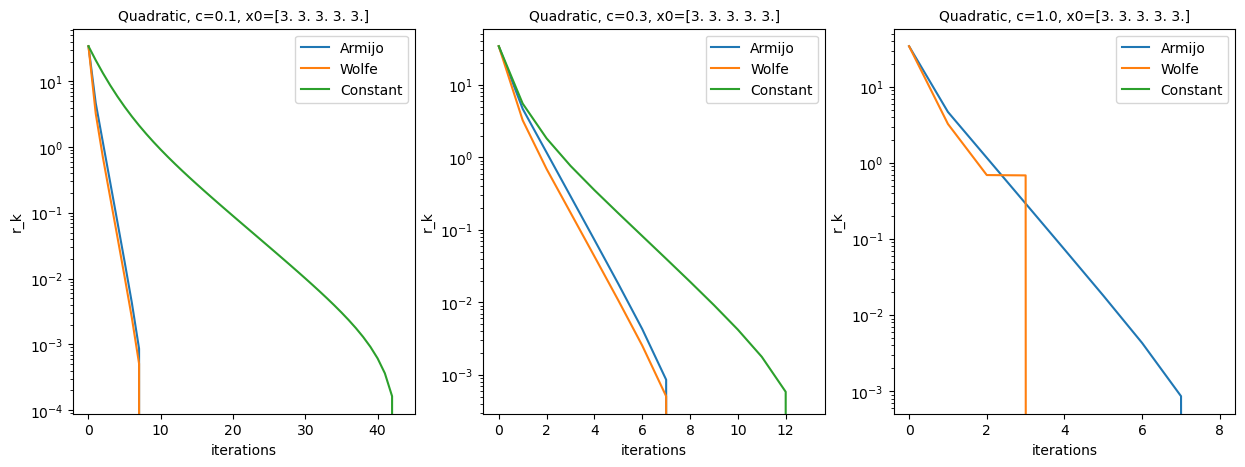

In [65]:
# exp 3.4

v = np.random.randint(low=1, high=5, size=5)
A = scipy.sparse.diags(v)
b = np.random.random(5)
oracle = oracles.QuadraticOracle(A, b)
x0 = np.zeros(5)


c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()

c = 0.3
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()


c = 1.0
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()


x0 = np.ones(5)
c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()

c = 0.3
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()


c = 1.0
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()


x0 = np.ones(5)*3
c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()

c = 0.3
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()


c = 1.0
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
func_opt_armijo = oracle.func(x_armijo)
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
func_opt_wolfe = oracle.func(x_wolfe)
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
func_opt_const = oracle.func(x_const)

plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), np.abs(history_armijo['func'] - func_opt_armijo), label='Armijo')
plt.plot(range(len(history_wolfe['time'])), np.abs(history_wolfe['func'] - func_opt_wolfe), label='Wolfe')
plt.plot(range(len(history_const['time'])), np.abs(history_const['func'] - func_opt_const), label='Constant')
plt.title(f'Quadratic, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('r_k')
plt.yscale('log')
plt.legend()

In [59]:
x_armijo

array([0.75651675, 0.47653592, 0.34117706, 0.27638248, 0.20173773])

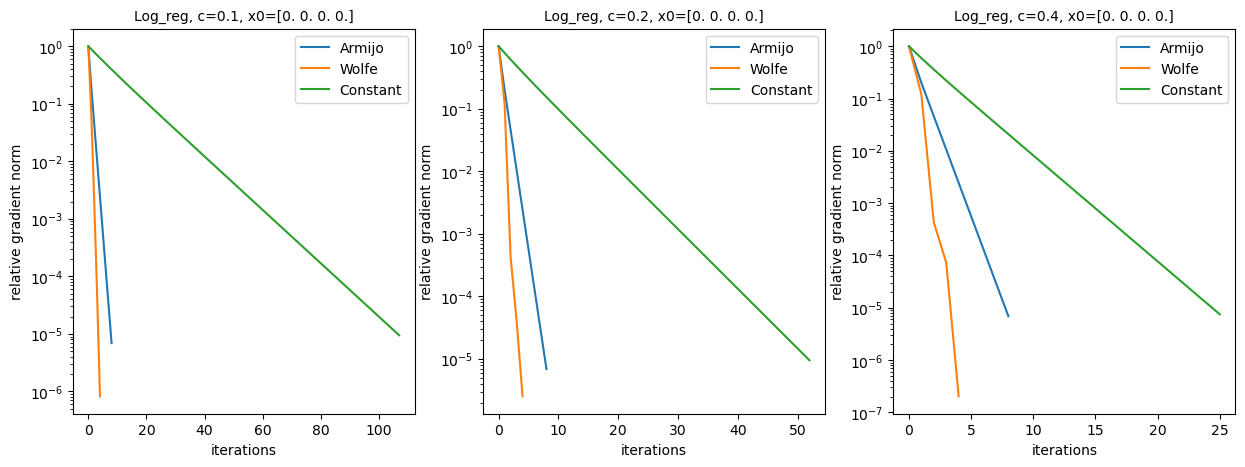

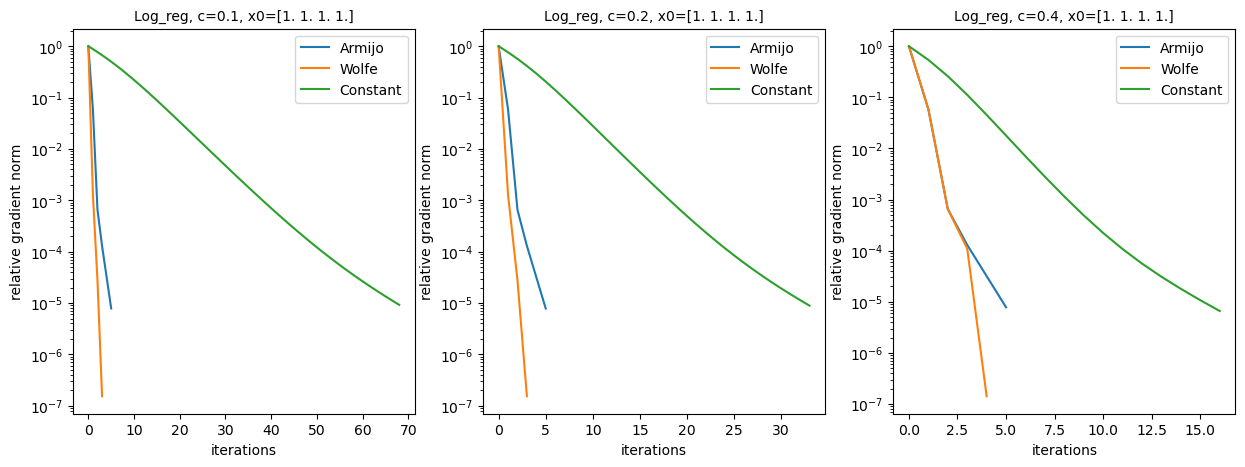

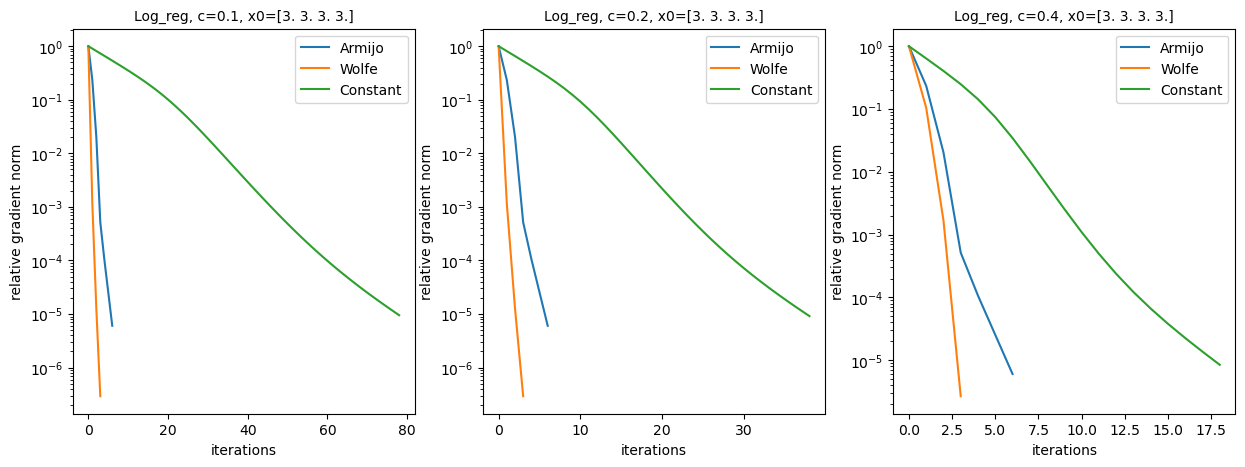

In [78]:
n=4
m=2
A = np.random.rand(m,n)
b = np.random.choice([-1,1], size=m)
regcoef = 0.5
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

x0 = np.zeros(n)
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.2
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.4
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


x0 = np.ones(n)
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.2
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.4
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


x0 = np.ones(n)*3
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.2
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.4
x_armijo, _, history_armijo = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.gradient_descent(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

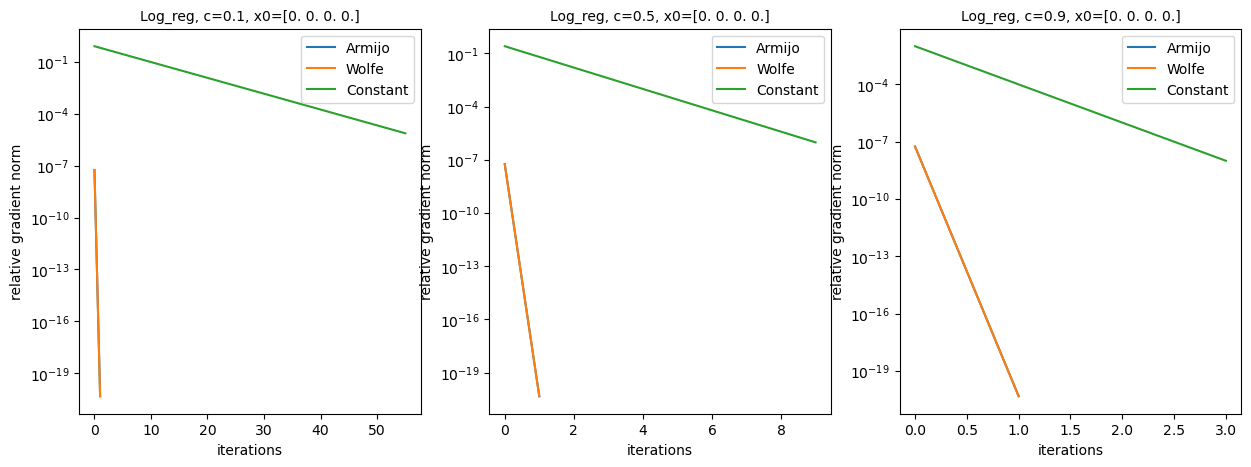

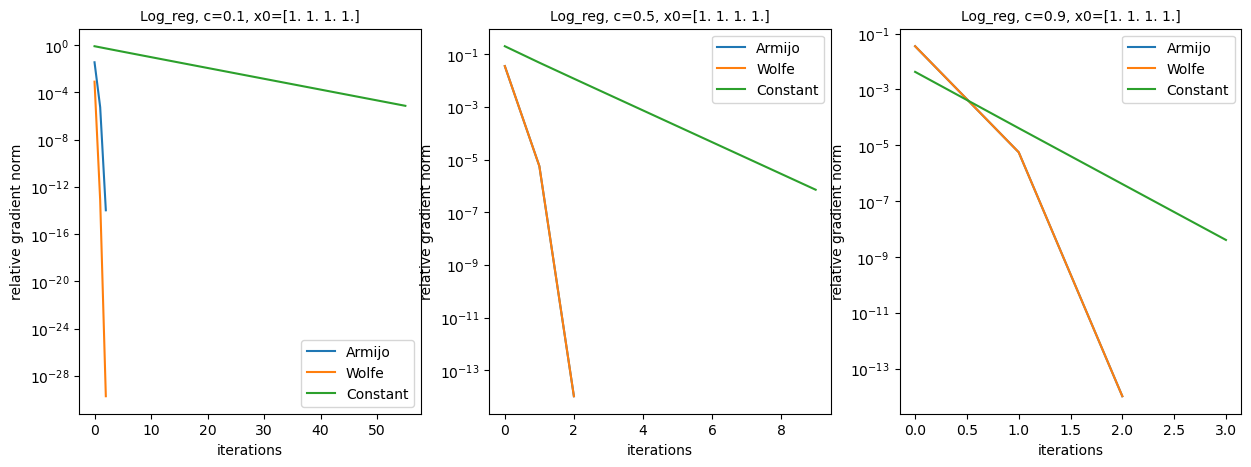

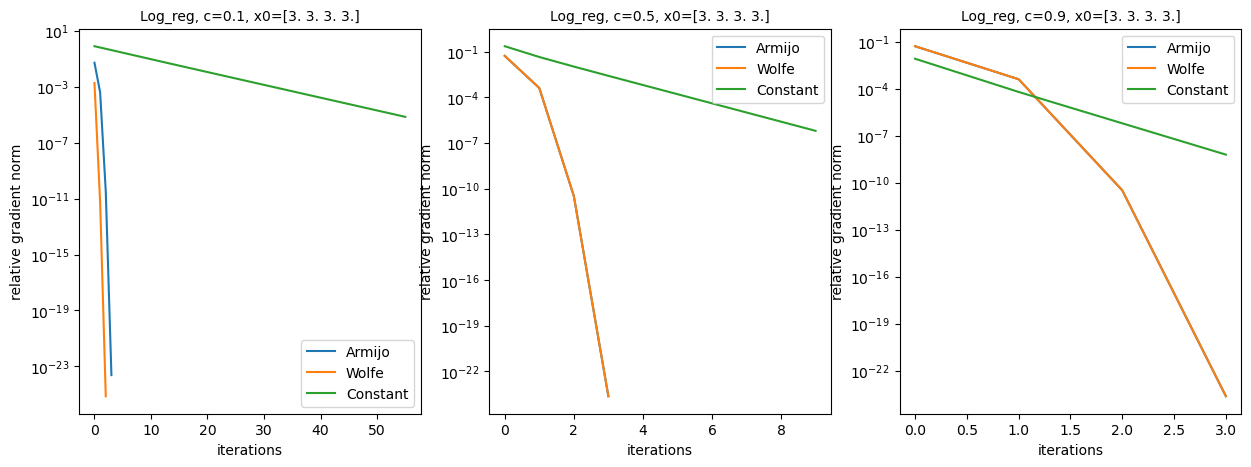

In [111]:
# exp 3.5

n=4
m=2
A = np.random.rand(m,n)
b = np.random.choice([-1,1], size=m)
regcoef = 0.5
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

x0 = np.zeros(n)
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.5
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.9
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


x0 = np.ones(n)
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.5
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.9
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


x0 = np.ones(n)*3
grad_norm_x0 = np.linalg.norm(oracle.grad(x0))
c = 0.1
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()

c = 0.5
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,2)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()


c = 0.9
x_armijo, _, history_armijo = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Armijo', 'c': c} )
grads_armijo = np.array(history_armijo['grad_norm'])
x_wolfe, _, history_wolfe = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Wolfe', 'c2': c} )
grads_wolfe = np.array(history_wolfe['grad_norm'])
x_const, _, history_const = optimization.newton(oracle, x_0=x0, trace=True, line_search_options={'method': 'Constant', 'c': c} )
grads_const = np.array(history_const['grad_norm'])


plt.subplot(1,3,3)
plt.plot(range(len(history_armijo['time'])), grads_armijo**2/grad_norm_x0**2, label='Armijo')
plt.plot(range(len(history_wolfe['time'])), grads_wolfe**2/grad_norm_x0**2, label='Wolfe')
plt.plot(range(len(history_const['time'])), grads_const**2/grad_norm_x0**2, label='Constant')
plt.title(f'Log_reg, c={c}, x0={x0}', fontsize=10)
plt.xlabel('iterations')
plt.ylabel('relative gradient norm')
plt.yscale('log')
plt.legend()